In [2]:
adult <- read.csv("C:/Users/student/Desktop/adult.csv", header = FALSE)
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ V1 : int  39 50 38 53 28 37 49 52 31 42 ...
 $ V2 : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ V3 : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ V4 : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ V5 : int  13 13 9 7 13 14 5 9 14 13 ...
 $ V6 : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ V7 : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ V8 : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ V9 : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ V10: Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ V11: int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ V12: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V13: int  40 13 40 40 40 40 16 45 50 40 ...
 $ V14: Factor w/ 42 levels " ?"," Cambodia",..: 40 40 40 40 6 40 24 40 40 40 ...
 $ V15: Factor w/ 

In [3]:
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education=num", "marital status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country","income")

In [6]:
for (i in 1:ncol(adult))
{  for (j in 1:length(adult))
  { if(adult[j,i] == " ?")
  {
   print(c(adult[j,]))
  }
  }
  }

count <- 0    #### this will just give the number of missing values
 for(i in 1:ncol(adult))
 { for (j in 1:nrow(adult))
 {  if (adult[j,i] == " ?")
 {
     count <- count + 1
 }
     
 }

 }
     print(count)

$age
[1] 40

$workclass
[1]  Private
9 Levels:  ?  Federal-gov  Local-gov  Never-worked  Private ...  Without-pay

$fnlwgt
[1] 121772

$education
[1]  Assoc-voc
16 Levels:  10th  11th  12th  1st-4th  5th-6th  7th-8th  9th ...  Some-college

$`education=num`
[1] 11

$`marital status`
[1]  Married-civ-spouse
7 Levels:  Divorced  Married-AF-spouse ...  Widowed

$occupation
[1]  Craft-repair
15 Levels:  ?  Adm-clerical  Armed-Forces  Craft-repair ...  Transport-moving

$relationship
[1]  Husband
6 Levels:  Husband  Not-in-family  Other-relative  Own-child ...  Wife

$race
[1]  Asian-Pac-Islander
Levels:  Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White

$sex
[1]  Male
Levels:  Female  Male

$`capital-gain`
[1] 0

$`capital-loss`
[1] 0

$`hours-per-week`
[1] 40

$`native-country`
[1]  ?
42 Levels:  ?  Cambodia  Canada  China  Columbia  Cuba ...  Yugoslavia

$income
[1]  >50K
Levels:  <=50K  >50K

[1] 4262


In [7]:
replace.mean <- function(x)
{  for (i in 1:ncol(x))
{  for (j in 1:length(x))
  { if (x[j,i] == " ?")
  {
    x[j,i] <- mean(x[,i])
  }
  }
  }
}

 for(i in 1:ncol(adult)) 
    { mode <- unique(adult[,i])[which.max(tabulate(match(adult,unique(adult[,i]))))]
         {
             for(j in 1:nrow(adult))
             {    if(adult[j,i] == " ?")
             {
                 adult[j,i] <- mode
             }
             }
         }
         
     }

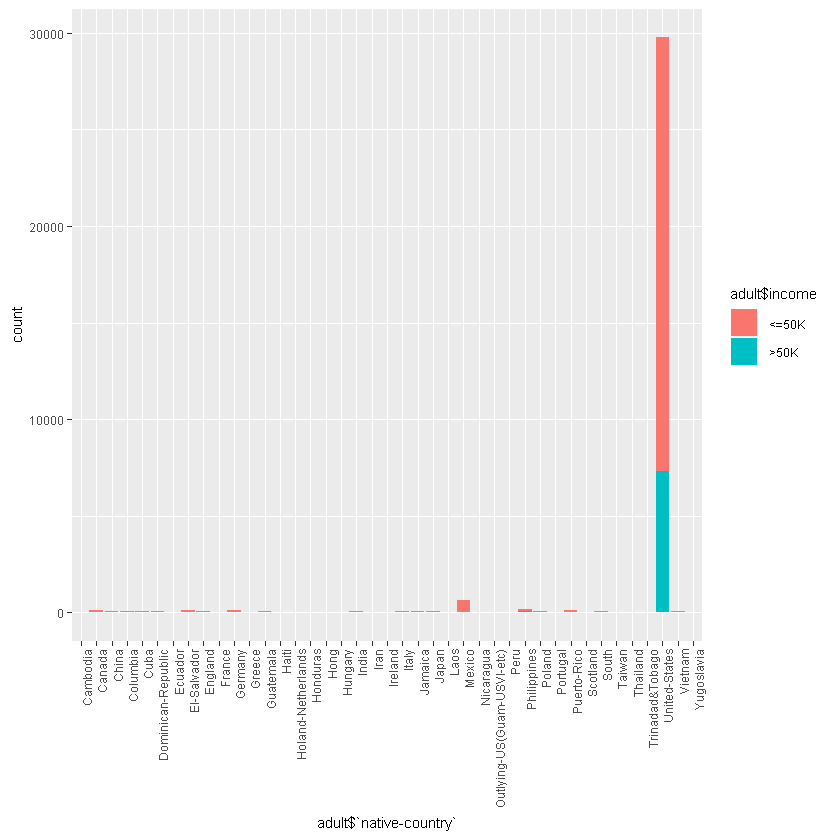

In [8]:
library(ggplot2)


###native country filled by income
print(ggplot(adult) + geom_bar(mapping = aes(x = adult$`native-country`, fill = adult$income)) + theme(text = element_text(size=9), axis.text.x = element_text(angle=90, hjust=1)))

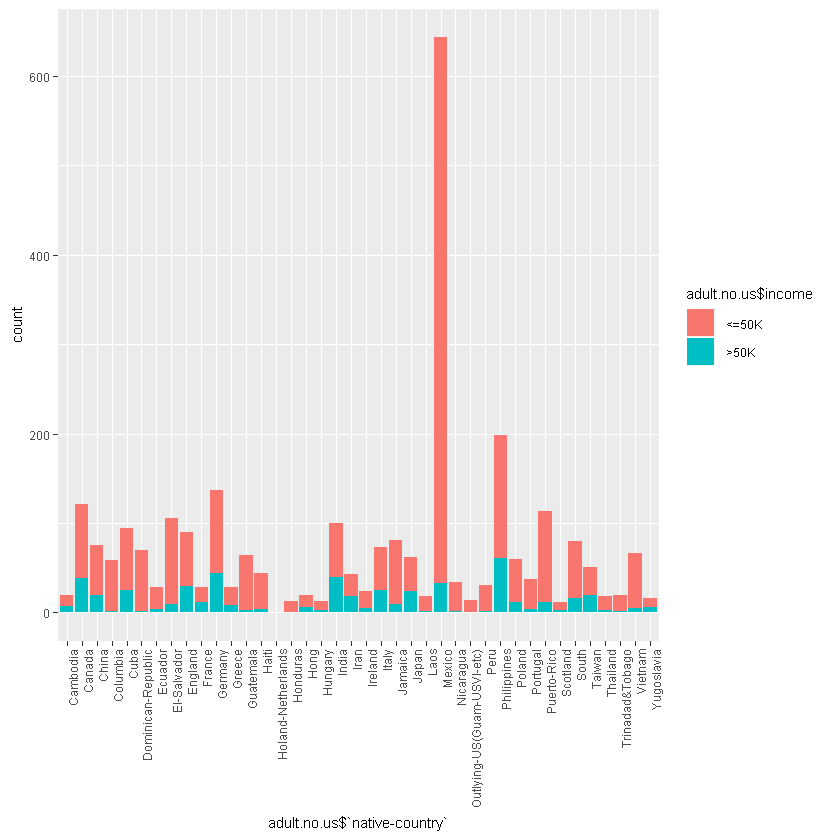

In [9]:
adult.no.us <- subset(adult, adult$`native-country`!= " United-States")

print(ggplot(adult.no.us) + geom_bar(mapping = aes(x = adult.no.us$`native-country`, fill = adult.no.us$income)) + theme(text = element_text(size=9), axis.text.x = element_text(angle=90, hjust=1)))

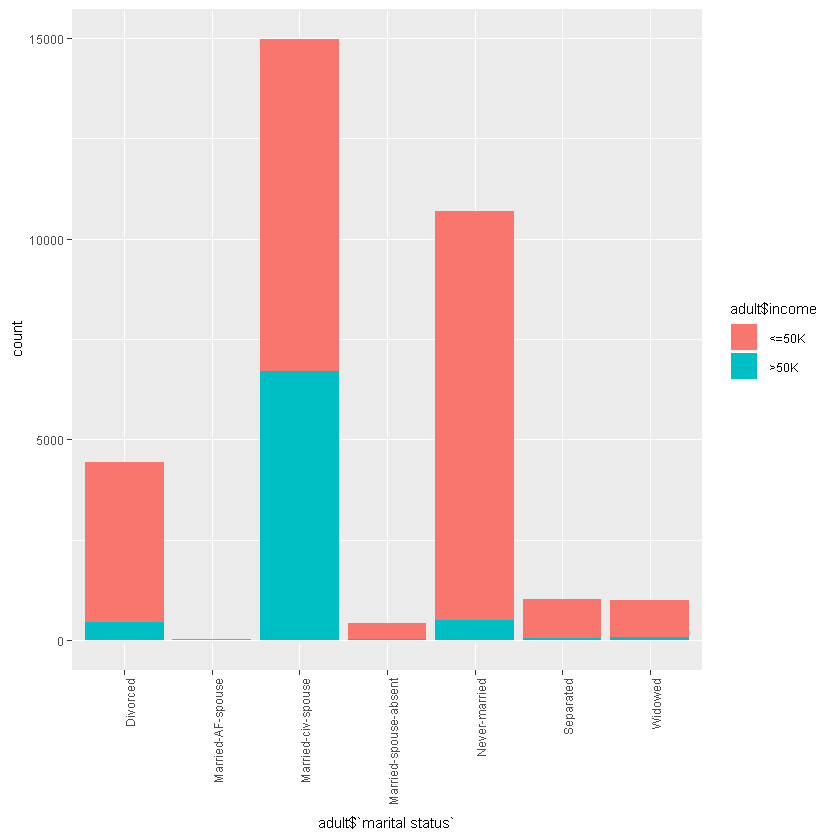

In [10]:
print(ggplot(adult) + geom_bar(mapping = aes(x = adult$`marital status`, fill = adult$income)) + theme(text = element_text(size=9), axis.text.x = element_text(angle=90, hjust=1)))

ERROR: Error: Aesthetics must be either length 1 or the same as the data (32561): x, fill, alpha


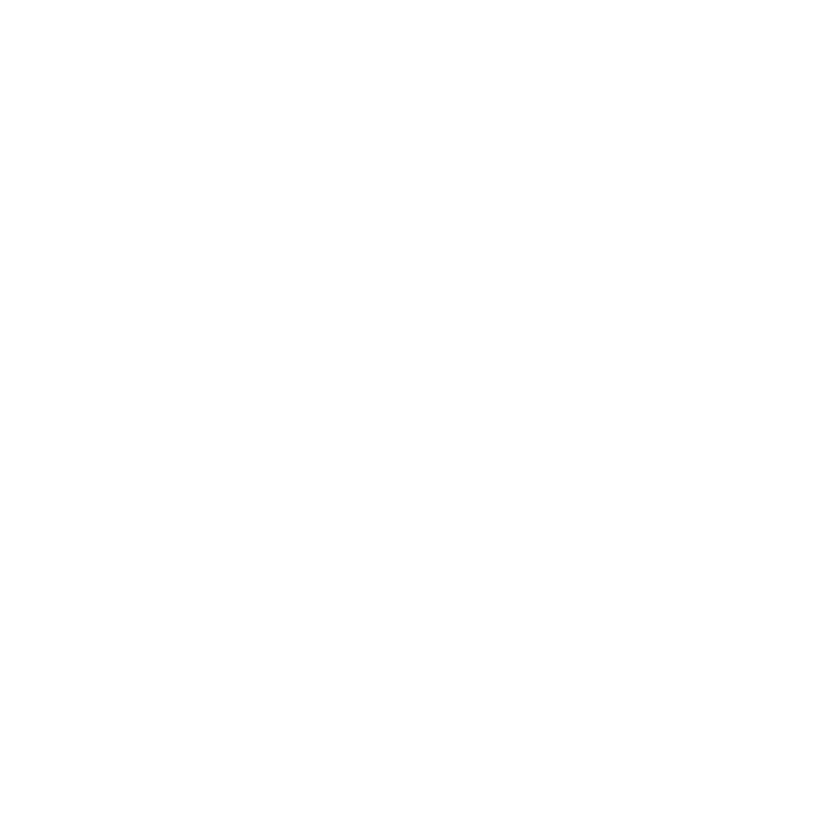

In [11]:
 print(ggplot(adult) + geom_density(mapping = aes(x = adult$`education-num`, fill = adult$income, alpha = .5)))

In [12]:
library(caret)
splitIndex <- createDataPartition(adult$income, p = .6, list = FALSE, times = 1)
train <- adult[ splitIndex,]
test <- adult[-splitIndex,]

Loading required package: lattice


In [13]:
library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")

pred <- predict(mytree, test, type = "class")

In [14]:
cm=confusionMatrix(data=pred, reference =test$income, positive = " >50K")
cm

mean(pred != test$income)

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9542  1624
     >50K     346  1512
                                          
               Accuracy : 0.8487          
                 95% CI : (0.8425, 0.8549)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5194          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4821          
            Specificity : 0.9650          
         Pos Pred Value : 0.8138          
         Neg Pred Value : 0.8546          
             Prevalence : 0.2408          
         Detection Rate : 0.1161          
   Detection Prevalence : 0.1427          
      Balanced Accuracy : 0.7236          
                                          
       'Positive' Class :  >50K           
                                          

[1] 0.1512592

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


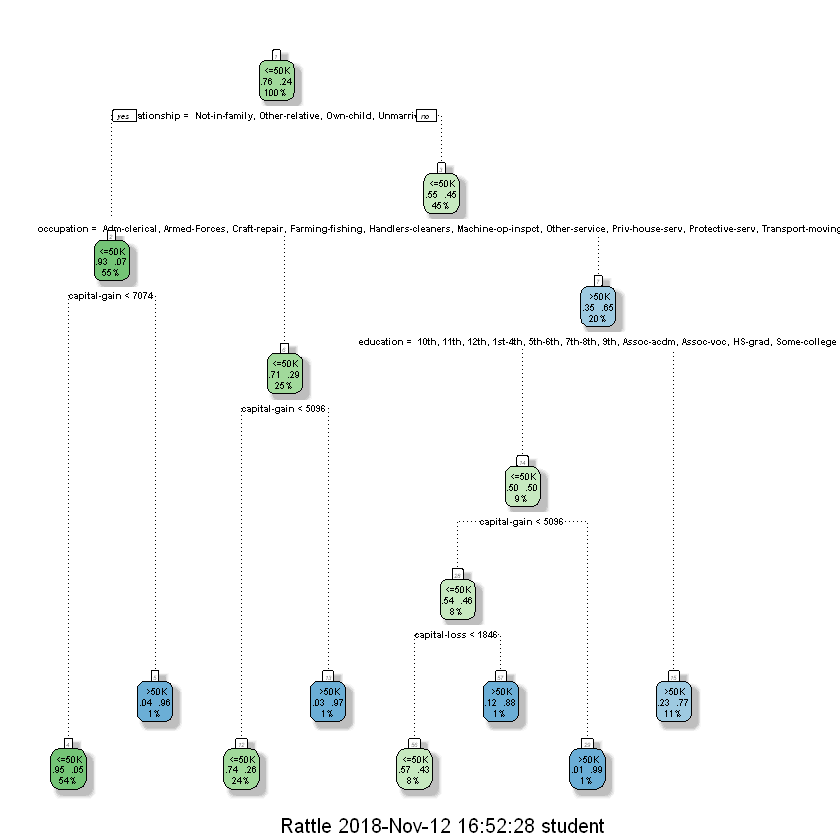

In [15]:
library(rattle)
fancyRpartPlot(mytree)

In [16]:
model <- train(income~.,data =train, method = "rpart")
pred2=predict(model,test)

cm2=confusionMatrix(pred2, test$income, positive=" >50K")

ERROR: Error in `[.data.frame`(m, labs): undefined columns selected


In [17]:
library(caret)
for (i in 7:9)
{
  splitIndex <- createDataPartition(adult$income, p = (.1*i), list = FALSE, times = 1)
train <- adult[ splitIndex,]
test <- adult[-splitIndex,]



library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")

pred <- predict(mytree, test, type = "class")



cm=confusionMatrix(data=pred, reference =test$income, positive = " >50K")

print(cm)
print(mean(pred != test$income))

}

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7050  1112
     >50K     366  1240
                                          
               Accuracy : 0.8487          
                 95% CI : (0.8414, 0.8557)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5359          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5272          
            Specificity : 0.9506          
         Pos Pred Value : 0.7721          
         Neg Pred Value : 0.8638          
             Prevalence : 0.2408          
         Detection Rate : 0.1269          
   Detection Prevalence : 0.1644          
      Balanced Accuracy : 0.7389          
                                          
       'Positive' Class :  >50K           
                                          
[1] 0.1513104
C